Group Members:

-- Eman Khadim
-- Rimsha Masood
-- Mohammad Arbaaz
-- Bisma Arshad

In [1]:
import sys
sys.path.append('../')
from src.finance_ml.data_preparation.data_preparation import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [10]:
import os

ticker = 'Apple'
fname_USDEUR = 'FX/USDEUR_2020-04-07_2022-04-06.parquet'
N = 10000

dataloader = DataLoader(time_index_col='DATE', keep_cols=['VOLUME', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'TRANSACTIONS'])

# Construct file path using os.path.join()
file_path = os.path.join('C:\\Users\\HP\\Downloads\\ML-in-Finance-main\\ML-in-Finance-main\\data', fname_USDEUR)

original_data = dataloader.load_dataset({ticker: file_path}).iloc[:N]

df_win23 = copy.deepcopy(original_data)

close_prices = df_win23['Apple_CLOSE']
open_prices = df_win23['Apple_OPEN']
high_prices = df_win23['Apple_HIGHT']
low_prices = df_win23['Apple_LOW']

In [11]:
def calculate_SMA(data, window_size):  # SMA function
    series = pd.Series(data)
    sma = series.rolling(window=window_size).mean()
    sma_list = sma.dropna().tolist()
    return sma_list


def calculate_triangular_moving_average(data, window_size):   # TMA function
    SMA = calculate_SMA(data, window_size)

    n = len(SMA)
    moving_average = []

    for i in range(n):
        if i + window_size <= len(SMA):
            subset = SMA[i:i + window_size]
            subset = list(subset)

            mid_point = len(subset) // 2 # calculating weights in a trangle manner
            weights = list(range(1, mid_point + 2)) + list(range(mid_point, 0, -1))

            average = sum(val * weight for val, weight in zip(subset, weights)) / sum(weights)
            moving_average.append(average)
        else:
            moving_average.append(None)

    return moving_average

In [13]:
# Calculate TMA
window_size=23
result_close= calculate_triangular_moving_average(close_prices, window_size) # to get result for close price
print(result)


[0.9175810295893724, 0.9175677143719808, 0.9175544444444446, 0.9175411533816425, 0.9175279317632852, 0.9175148429951689, 0.917501884057971, 0.9174891394927533, 0.9174766878019324, 0.9174648429951691, 0.9174539522946861, 0.9174442330917876, 0.9174358091787439, 0.9174289221014491, 0.917423695652174, 0.9174203351449274, 0.9174189734299516, 0.9174197675120772, 0.9174229045893719, 0.9174285446859902, 0.9174368780193236, 0.9174475875603866, 0.9174602143719804, 0.9174744806763285, 0.9174902536231885, 0.9175073611111111, 0.917525697463768, 0.9175449788647343, 0.9175649909420289, 0.9175854619565218, 0.917606141304348, 0.9176268115942029, 0.9176470138888886, 0.9176666606280194, 0.917685881642512, 0.917704631642512, 0.9177227566425122, 0.9177401600241546, 0.9177567904589373, 0.9177727083333332, 0.9177878562801932, 0.9178022946859904, 0.9178161503623189, 0.9178295320048309, 0.9178429227053139, 0.9178568055555556, 0.9178713345410627, 0.9178867783816425, 0.917903390700483, 0.9179213315217392, 0.9179

In [15]:
result_open = calculate_triangular_moving_average(open_prices, window_size) # to get results for open prices
print(result_open)

[0.917581452294686, 0.9175704076086956, 0.9175595712560383, 0.9175488043478259, 0.9175381249999999, 0.9175275332125605, 0.9175170138888888, 0.9175066304347825, 0.9174965157004829, 0.9174869384057972, 0.9174779830917874, 0.9174699577294686, 0.917462940821256, 0.9174570289855072, 0.9174523822463766, 0.9174491576086956, 0.9174474637681159, 0.9174474939613524, 0.9174494474637681, 0.9174535054347825, 0.9174597826086957, 0.9174682427536232, 0.9174787711352655, 0.9174910537439612, 0.9175048641304347, 0.9175200392512077, 0.9175364160628019, 0.9175538737922704, 0.9175722463768113, 0.9175912650966183, 0.9176106582125604, 0.9176301056763285, 0.9176492602657006, 0.917667792874396, 0.9176855797101449, 0.9177026177536233, 0.917718970410628, 0.9177346225845411, 0.9177496437198067, 0.9177640458937198, 0.9177778170289853, 0.9177909752415458, 0.9178035778985506, 0.9178158725845409, 0.9178281642512078, 0.917840890700483, 0.9178544263285023, 0.9178690609903385, 0.9178849969806764, 0.9179024335748791, 0.91

In [17]:
result_high=calculate_triangular_moving_average(high_prices, window_size) # to get results for high prices
print(result_high)

[0.9176342814009659, 0.9176212922705314, 0.9176084661835746, 0.9175957487922707, 0.9175831370772946, 0.9175706491545892, 0.9175583152173914, 0.9175462560386473, 0.9175345440821255, 0.9175234571256037, 0.9175132246376813, 0.9175041515700484, 0.9174964160628019, 0.9174901871980676, 0.9174855495169082, 0.9174826479468601, 0.9174816092995169, 0.9174826207729468, 0.9174858605072463, 0.9174914371980675, 0.9174994836956523, 0.9175098007246378, 0.9175221437198068, 0.917536213768116, 0.9175517632850239, 0.9175686050724637, 0.9175866243961354, 0.9176056310386473, 0.9176254619565216, 0.9176458544685988, 0.9176665247584541, 0.9176871739130436, 0.9177073882850242, 0.91772696557971, 0.9177458423913046, 0.9177639734299518, 0.9177813707729467, 0.917797986111111, 0.9178138043478261, 0.917828870772947, 0.9178431491545891, 0.9178566425120775, 0.9178694716183576, 0.9178818327294687, 0.9178941455314011, 0.917906884057971, 0.9179203411835749, 0.9179348037439612, 0.9179504800724639, 0.9179675483091789, 0.917

In [18]:
result_low=calculate_triangular_moving_average(low_prices, window_size) # to get results for low prices
print(result_low)

[0.9175193659420291, 0.917506564009662, 0.9174938435990337, 0.9174811594202897, 0.9174685265700481, 0.9174559359903378, 0.9174433967391303, 0.9174310628019327, 0.9174190881642512, 0.9174077868357489, 0.9173973429951692, 0.9173879740338164, 0.9173797614734299, 0.9173729498792268, 0.9173676811594204, 0.9173641183574879, 0.9173625000000002, 0.9173629498792271, 0.9173656431159419, 0.917370742753623, 0.9173783695652175, 0.917388372584541, 0.9174004438405797, 0.9174142964975844, 0.9174297312801935, 0.9174464764492755, 0.9174642874396136, 0.9174829468599035, 0.9175021950483093, 0.9175218508454106, 0.9175416394927536, 0.9175612469806766, 0.9175803140096619, 0.9175986594202897, 0.9176162862318843, 0.9176331461352658, 0.9176491847826086, 0.9176644293478263, 0.9176789734299517, 0.9176927868357487, 0.9177059027777779, 0.9177183725845411, 0.917730283816425, 0.917741838768116, 0.9177533423913045, 0.9177652113526569, 0.9177777506038645, 0.9177912620772948, 0.9178060477053138, 0.9178222675120771, 0.91

In [26]:
# Difference btw closing TMA and Opeing TMA
diff=[]
for i in range(min(len(result), len(result_open))):
    if result[i] is not None and result_open[i] is not None:

        difference = result[i] - result_open[i]
        diff.append(difference)
        
diff


[-4.227053136407477e-07,
 -2.6932367147569636e-06,
 -5.126811593703096e-06,
 -7.650966183381236e-06,
 -1.0193236714695075e-05,
 -1.26902173915866e-05,
 -1.5129830917892662e-05,
 -1.7490942029185774e-05,
 -1.9827898550484058e-05,
 -2.2095410628142353e-05,
 -2.4030797101337598e-05,
 -2.5724637681023843e-05,
 -2.713164251211264e-05,
 -2.810688405807671e-05,
 -2.8686594202631532e-05,
 -2.8822463768229944e-05,
 -2.8490338164322004e-05,
 -2.772644927517831e-05,
 -2.6542874396184857e-05,
 -2.496074879232424e-05,
 -2.290458937204143e-05,
 -2.0655193236573943e-05,
 -1.8556763285104694e-05,
 -1.6573067632696947e-05,
 -1.4610507246270998e-05,
 -1.2678140096644697e-05,
 -1.0718599033898712e-05,
 -8.894927536085007e-06,
 -7.255434782416081e-06,
 -5.803140096460879e-06,
 -4.516908212348625e-06,
 -3.2940821256266517e-06,
 -2.246376812009565e-06,
 -1.1322463766560986e-06,
 3.0193236710829296e-07,
 2.0138888887633044e-06,
 3.7862318842396547e-06,
 5.537439613512163e-06,
 7.1467391306034855e-06,
 8.6624

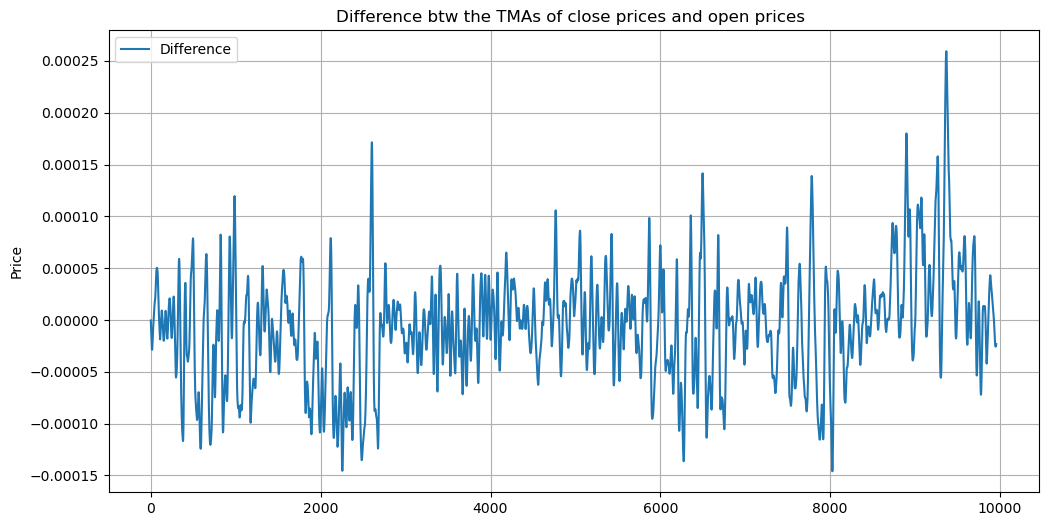

In [21]:
# Plot Difference
plt.figure(figsize=(12, 6))
plt.plot(diff, label='Difference')
plt.ylabel('Price')
plt.title('Difference btw the TMAs of close prices and open prices ')
plt.legend()
plt.grid()
plt.show()

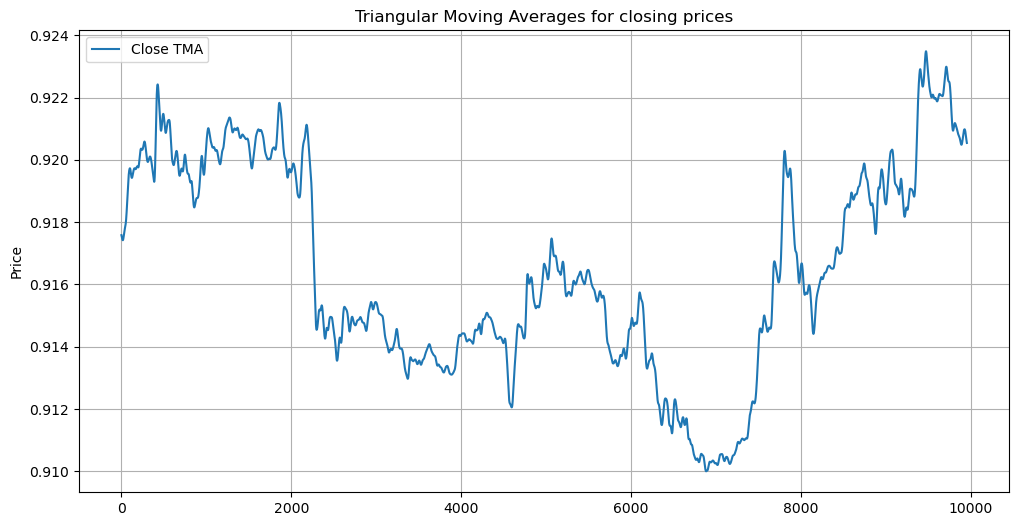

In [22]:
# Plot TMA
plt.figure(figsize=(12, 6))
plt.plot(result, label='Close TMA')
plt.ylabel('Price')
plt.title('Triangular Moving Averages for closing prices')
plt.legend()
plt.grid()
plt.show()

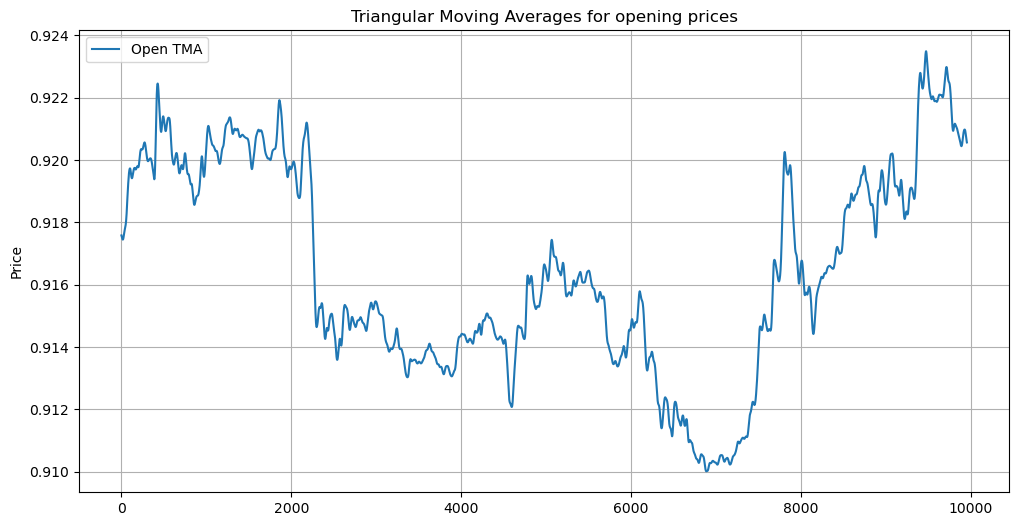

In [23]:
#plot open tma
plt.figure(figsize=(12, 6))
plt.plot(result_open, label='Open TMA')
plt.ylabel('Price')
plt.title('Triangular Moving Averages for opening prices')
plt.legend()
plt.grid()
plt.show()

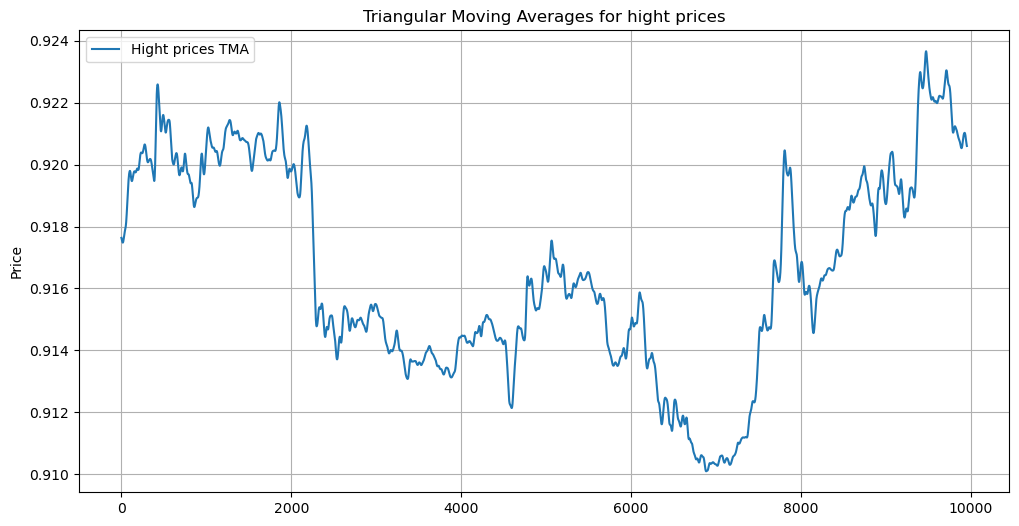

In [24]:
# Plot high TMA
plt.figure(figsize=(12, 6))
plt.plot(result_high, label='High prices TMA')
plt.ylabel('Price')
plt.title('Triangular Moving Averages for hight prices')
plt.legend()
plt.grid()
plt.show()

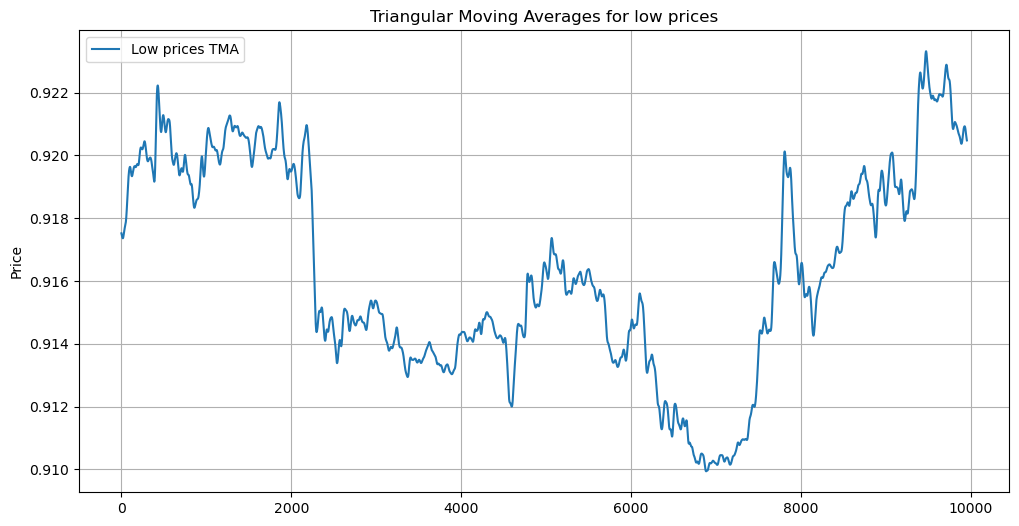

In [25]:
# Plot low TMA
plt.figure(figsize=(12, 6))
plt.plot(result_low, label='Low prices TMA')
plt.ylabel('Price')
plt.title('Triangular Moving Averages for low prices')
plt.legend()
plt.grid()
plt.show()